# The Central Limit Theorem

> The central limit theorem establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. The theorem is a key concept in probability theory because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.

The CLT states that if we take repeately take many independent random samples from any distribution (normal or not), and the plot the distribution of those means, then that distribution will approach the normal distribution. 

It it important because it allows us to to make inferences from a sample about a population, without needing to know the characteristics of the whole population. Because non normal distributions can be used to create normal distributions, it implies that statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions. For example, hypothesis testing, confidence intervals, and p-value analysis are all based on the CLT. 


In [1]:
import seaborn as sns
sns.set(style='whitegrid')
sns.set_context('notebook')
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data_all = np.c_[data.data, data.target.reshape((-1, 1))]
columns = data.feature_names + ['target']
data = pd.DataFrame(data_all, columns=columns)
data.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


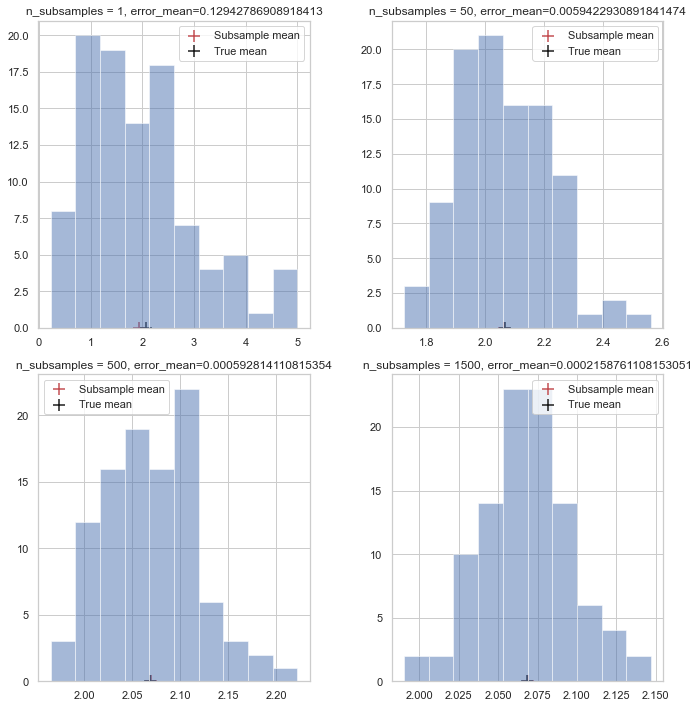

In [4]:
from tools.draw.utils import most_cosmetic_pair
import matplotlib.pyplot as plt
from progressbar import ProgressBar


def means_trail(data, n_trails, n_samples):
    return [data.sample(n_samples).mean() for _ in range(n_trails)]


def demo_clt(data, target_column, subsample_sizes_per_plot, n_trails, **kwargs):
    f, ax = plt.subplots(figsize=kwargs.get('figsize', None))
    r, c = most_cosmetic_pair(len(subsample_sizes_per_plot))
    true_mean = sum(data[target_column]) / len(data[target_column])

    bar = ProgressBar()
    for i, subsample_size in enumerate(subsample_sizes_per_plot, 1):
        ax = plt.subplot(r, c, i)
        means = means_trail(data[target_column], n_trails, subsample_size)
        mean_of_means = sum(means) / len(means)
        ax.scatter(mean_of_means, 0, marker='+', color='r', s=150, label='Subsample mean')
        ax.scatter(true_mean, 0, marker='+', color='k', s=150, label='True mean')
        ax.hist(means, alpha=.5)
        ax.set_title(f'n_subsamples = {subsample_size}, error_mean={abs(true_mean - mean_of_means)}')
        ax.legend()
    plt.tight_layout()
    plt.show()


demo_clt(data, 'target', [1, 50, 500, 1500], 100, figsize=(10,10))